In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

from utils.statistics import check_normality, check_homoscedasticity, check_group_difference

## Moving Average Recursive

### Hyperparameters

In [2]:
df = pd.read_csv("../../results/tuning/moving_average_recursive.csv", sep=";")
assert check_normality(df["MAE"])
assert check_normality(df["F1-Score"])

#### Min-Max Normalization

Significant group difference: False
Normalization
0    0.470712
1    0.485831
Name: F1-Score, dtype: float64


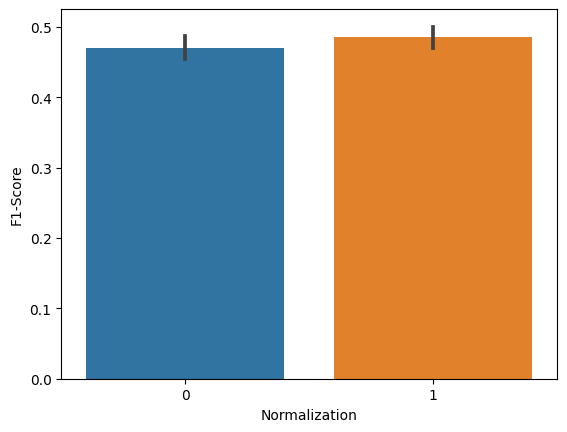

In [3]:
assert check_homoscedasticity(*[df[df["Normalization"]==val]["F1-Score"] for val in df["Normalization"].unique()])
print("Significant group difference:", check_group_difference(df[df["Normalization"]==True]["F1-Score"], df[df["Normalization"]==False]["F1-Score"]))
print(df.groupby("Normalization")["F1-Score"].mean())
sns.barplot(x="Normalization", y="F1-Score", data=df);

#### Look Back Window Size

Significant group difference: False
LookBackWindowSize
10      0.013676
15      0.013428
20      0.013163
25      0.012902
65      0.012768
260     0.012831
520     0.012907
780     0.013224
1040    0.013740
1300    0.013319
Name: MAE, dtype: float64


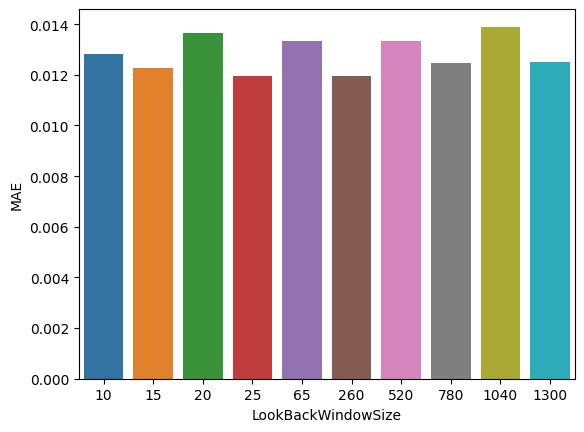

In [4]:
print("Significant group difference:", check_group_difference(*[df[df["LookBackWindowSize"]==val]["MAE"] for val in df["LookBackWindowSize"].unique()]))
print(df.groupby("LookBackWindowSize")["MAE"].mean())
sns.barplot(x="LookBackWindowSize", y="MAE", data=df[df["Normalization"]==True]);

### Conclusion
- Normalization (on vs off) doesn't significantly affect F1 scores, so keep it activated.
- The "look_back_window_size" doesn't make a significant difference, so just set it to 260 (1 year).